In [1]:
%pylab inline
plt.style.use('dark_background')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from os.path import join

In [3]:
%run ../tools/echelle.py
cb = Calibrations('../calibration_files')

cb.filenames['orders'] = 'pattern_cmos.txt'
#cb.filenames['sphr'] = 'absolute_cmos.sif'
cb.filenames['sphr'] = 'sphere_CMOS.sif'
cb.filenames['bkgr'] = 'sphere_CMOS_bkg.sif'
cb.filenames['wavelength'] = 'Th_wavelength_CMOS.txt'

In [4]:
cb.start()

C:\Python37\lib\site-packages\scipy\interpolate\interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
C:\Python37\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


In [5]:
os.listdir('../calibration_files/')[-4]

'sphere_CMOS.sif'

In [6]:
os.path.exists('../calibration_files/sphere_CMOS.sif')

True

In [10]:
%run ../tools/echelle.py

#pth = '../calibration_files/sphere_CMOS.sif'
pth = r'C:\Users\queez\Documents\iPyNotes\calibration_files\ThAr_10.0s_16bit.sif'
#pth = r'C:\Users\queez\Dropbox\DataSvn\#LHD\Raw_images\20190206\151953_Echelle.SIF'
#pth = r'C:\Users\queez\Dropbox\DataSvn\#LHD\Raw_images\20190213\152393_Echelle.SIF'

em = EchelleImage(pth,clbr=cb)

In [ ]:
em.calculate_order_spectra()
em.correct_order_shapes()


In [11]:
em.calculate_order_spectra()
print(em.order_spectra.shape)
a = em.order_spectra.copy()
em.correct_order_shapes()
print(em.order_spectra.shape)
b = em.order_spectra.copy()

(1, 29)
(1, 29, 2560)


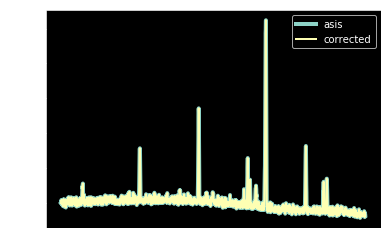

In [13]:
frame = 0
o = 28
plot(a[frame,o],lw=4,label='asis')
plot(b[frame,o],lw=2,ls='-',label='corrected')
legend()

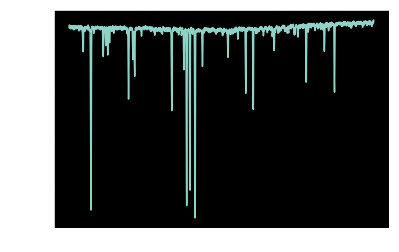

In [16]:
df = 1
f0 = 1 + df*2
o = 6
plot(
    (em.order_spectra[f0:f0+df,o,:].sum(axis=0)-em.order_spectra[0,o,:]*df)/df,
    '-'
)
#ylim([-10,2000])
#xlim(1040,1120)

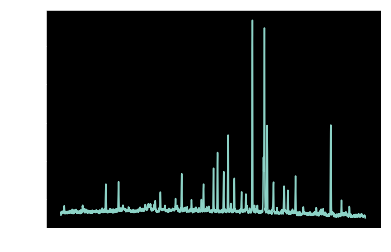

In [27]:
frame = 0
o = 8
plot(em.order_spectra[frame,o,:])

In [17]:
em.calculate_order_spectra()
em.correct_order_shapes()
em.calculate_spectra()
#em.plot_order_image(28,6,20)

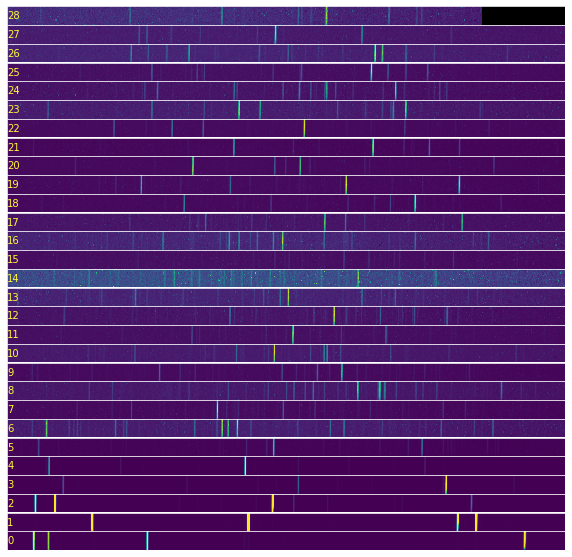

In [18]:
frame = 0
em.plot_cut_image(frame,5)
gcf().set_size_inches(10,10)
#savefig('CMOS_cut.png',dvi=300,pad_inches=0,bbox_inches='tight')

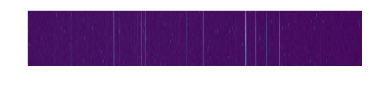

In [21]:
em.plot_order_image(0,25,25)

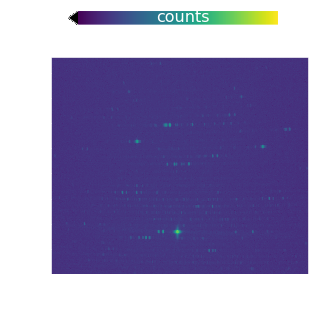

In [162]:
em.plot_frame(17,scale=10)

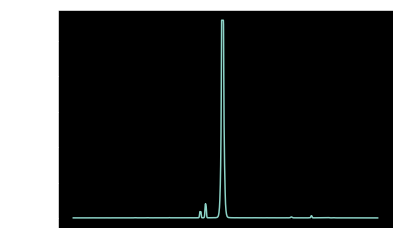

In [148]:
plot(em.order_spectra[7,6,:])

In [22]:
s = Spectrum(em)

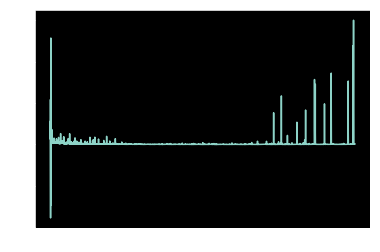

In [23]:
frame = 0
x = s.wavelength
y = s.spectra_to_save['wm'][frame]
plot(x,y)

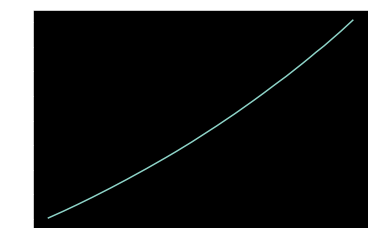

In [16]:
plot(x)